# Refit the model to suit healthcare services

In [2]:
import nltk
import re
import pathlib

from pathlib import Path
from nltk.stem import WordNetLemmatizer 

In [3]:
import pandas as pd

df = pd.read_csv("../data/overview-of-recordings.csv")
df.head()

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


## Dataset Preprocessing

In [4]:
#Analyze Data
def explore_data(df):
    print(f"The data contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
    print(f'Dataset columns: {df.columns}\n')
    print(df.info())

explore_data(df)

The data contains 6661 rows and 13 columns.

Dataset columns: Index(['audio_clipping', 'audio_clipping:confidence',
       'background_noise_audible', 'background_noise_audible:confidence',
       'overall_quality_of_the_audio', 'quiet_speaker',
       'quiet_speaker:confidence', 'speaker_id', 'file_download', 'file_name',
       'phrase', 'prompt', 'writer_id'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   audio_clipping                       6661 non-null   object 
 1   audio_clipping:confidence            6661 non-null   float64
 2   background_noise_audible             6661 non-null   object 
 3   background_noise_audible:confidence  6661 non-null   float64
 4   overall_quality_of_the_audio         6661 non-null   float64
 5   quiet_speaker                        

## Check NaN Values and Duplicates

In [5]:
df.isna().sum()

audio_clipping                         0
audio_clipping:confidence              0
background_noise_audible               0
background_noise_audible:confidence    0
overall_quality_of_the_audio           0
quiet_speaker                          0
quiet_speaker:confidence               0
speaker_id                             0
file_download                          0
file_name                              0
phrase                                 0
prompt                                 0
writer_id                              0
dtype: int64

In [6]:
def checking_removing_duplicates(df):
    count_dups = df.duplicated().sum()
    print("Number of Duplicates: ", count_dups)
    if count_dups >= 1:
        df.drop_duplicates(inplace=True)
        print('Duplicate values removed!')
    else:
        print('No Duplicate values')
checking_removing_duplicates(df)

Number of Duplicates:  0
No Duplicate values


In [7]:
df_text = df[['phrase', 'prompt']]
df_text.head()

,phrase,prompt
0,When I remember her I feel down,Emotional pain
1,When I carry heavy things I feel like breaking...,Hair falling out
2,there is too much pain when i move my arm,Heart hurts
3,My son had his lip pierced and it is swollen a...,Infected wound
4,My muscles in my lower back are aching,Infected wound


## Text Cleaning

1. Load raw text data
2. Split into token
3. Convert to lowercase
4. Remove punctuation from each token
5. Filter out non-alphabetic tokens
6. Filter out stop words

In [8]:
def clean_text(docs):
  # Reducing the different forms of a word to one single form
  lemmatizer = WordNetLemmatizer()
  # Split into words
  words = nltk.word_tokenize(docs)
  # Convert to lower case
  lower_case = [w.lower() for w in words]
  # Remove punctuation from each word
  remove_punctuation = [re.sub(r'[^\w\s]', '', w) for w in lower_case]
  # Remove non-alphabetic tokens
  words = [word for word in remove_punctuation if word.isalpha()]
  # Filter stop words
  words = [w for w in words if w not in nltk.corpus.stopwords.words('english')]
  # Filter out short tokens
  words = [word for word in words if len(word) > 2]
  # Stem all the words in the sentence
  lem_words = [lemmatizer.lemmatize(word) for word in words]
  combined_text = ' '.join(lem_words)
  return combined_text

In [9]:
def clean_text_2(docs):
  # Reducing the different forms of a word to one single form
  lemmatizer = WordNetLemmatizer()
  # Split into words
  words = nltk.word_tokenize(docs)
  # Convert to lower case
  lower_case = [w.lower() for w in words]
  # Remove punctuation from each word
  remove_punctuation = [re.sub(r'[^\w\s]', '', w) for w in lower_case]
  # Remove non-alphabetic tokens
  words = [word for word in remove_punctuation if word.isalpha()]
  # Stem all the words in the sentence
  lem_words = [lemmatizer.lemmatize(word) for word in words]
  combined_text = ' '.join(lem_words)
  return combined_text

In [10]:
df_text['phrase'] = df['phrase'].apply(clean_text)
df_text.head(5)

/var/folders/kk/rt5sttrx6psck2z095w2rzr40000gn/T/ipykernel_40043/3553022123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['phrase'] = df['phrase'].apply(clean_text)


,phrase,prompt
0,remember feel,Emotional pain
1,carry heavy thing feel like breaking back,Hair falling out
2,much pain move arm,Heart hurts
3,son lip pierced swollen skin inside lip grey l...,Infected wound
4,muscle lower back aching,Infected wound


## Defining labels

In [11]:
s = set(list(df['prompt']))
j = 0
labels = {}
for i in s:
  labels[i] = j
  j+=1

In [12]:
# Create path to save class names
class_names_path = Path("../class_names.txt")
class_names_path

PosixPath('../class_names.txt')

In [13]:
# Write class names to text file
with open(class_names_path, "w") as f:
  print(f"[INFO] Saving prompt class names to text file at: {class_names_path}")
  f.write("\n".join(labels)) # new line per class name

[INFO] Saving prompt class names to text file at: ../class_names.txt


In [14]:
df = df_text.copy()

In [15]:
df

,phrase,prompt
0,remember feel,Emotional pain
1,carry heavy thing feel like breaking back,Hair falling out
2,much pain move arm,Heart hurts
3,son lip pierced swollen skin inside lip grey l...,Infected wound
4,muscle lower back aching,Infected wound
...,...,...
6656,feel burning sensation gut hour meal,Stomach ache
6657,split thumb heal,Open wound
6658,feel lot pain joint,Joint pain
6659,area around heart feel good,Heart hurts


In [16]:
import transformers
import torch

from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['prompt']]
        self.texts = [tokenizer(text, padding='max_length', max_length = 20, truncation=True,return_tensors="pt") for text in df['phrase']]


    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        return self.texts[idx]

    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y
  

/Users/fbrynpk/anaconda3/envs/baymax_lite/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
from torch import nn

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.3):

        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, len(labels))

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropped_output = self.dropout(pooled_output)
        linear_output = self.linear(dropped_output)


        return (linear_output)

In [18]:
custom_model = BertClassifier()

In [19]:
custom_model

BertClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [20]:
import numpy as np

df_train, df_val = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df))])

print(len(df_train), len(df_val))

5328 1333


In [21]:
train, val = Dataset(df_train), Dataset(df_val)

In [22]:
from tqdm.auto import tqdm

def train(model, train_data, val_data, learning_rate, epochs):
    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=128)

    if torch.backends.mps.is_available():
        device = 'mps'
    elif torch.cuda.is_available():
        device = 'cuda'
    else:
        device = 'cpu'
        
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    model = model.to(device)
    criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.1).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                
                train_label=train_label.to(device)
                output=output.to(device)
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                optimizer.zero_grad()
                batch_loss.backward()
                optimizer.step()

            
            total_acc_val = 0
            total_loss_val = 0
            
            model.eval()
            with torch.inference_mode():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)
                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
                    
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data):.3f} \
                | Train Accuracy: {total_acc_train / len(train_data):.3f} \
                | Val Loss: {total_loss_val / len(val_data):.3f} \
                | Val Accuracy: {total_acc_val / len(val_data):.3f}')
            
            results['train_loss'].append(total_loss_train/len(train_data))
            results['test_loss'].append(total_loss_val/len(val_data))
            results['train_acc'].append(total_acc_train/len(train_data))
            results['test_acc'].append(total_acc_val/len(val_data))
            
    return results

In [23]:
results = train(custom_model, df_train, df_val, 1e-5, 5)

  0%|          | 0/42 [00:00<?, ?it/s]/Users/fbrynpk/anaconda3/envs/baymax_lite/lib/python3.11/site-packages/torch/autograd/__init__.py:200: UserWarning: The operator 'aten::masked_scatter_' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 42/42 [00:30<00:00,  1.38it/s]


Epochs: 1 | Train Loss: 0.024                 | Train Accuracy: 0.134                 | Val Loss: 0.022                 | Val Accuracy: 0.491


100%|██████████| 42/42 [00:29<00:00,  1.40it/s]


Epochs: 2 | Train Loss: 0.018                 | Train Accuracy: 0.736                 | Val Loss: 0.015                 | Val Accuracy: 0.893


100%|██████████| 42/42 [00:28<00:00,  1.45it/s]


Epochs: 3 | Train Loss: 0.011                 | Train Accuracy: 0.940                 | Val Loss: 0.010                 | Val Accuracy: 0.960


100%|██████████| 42/42 [00:28<00:00,  1.46it/s]


Epochs: 4 | Train Loss: 0.008                 | Train Accuracy: 0.987                 | Val Loss: 0.007                 | Val Accuracy: 0.996


100%|██████████| 42/42 [00:29<00:00,  1.44it/s]


Epochs: 5 | Train Loss: 0.006                 | Train Accuracy: 0.997                 | Val Loss: 0.006                 | Val Accuracy: 0.996


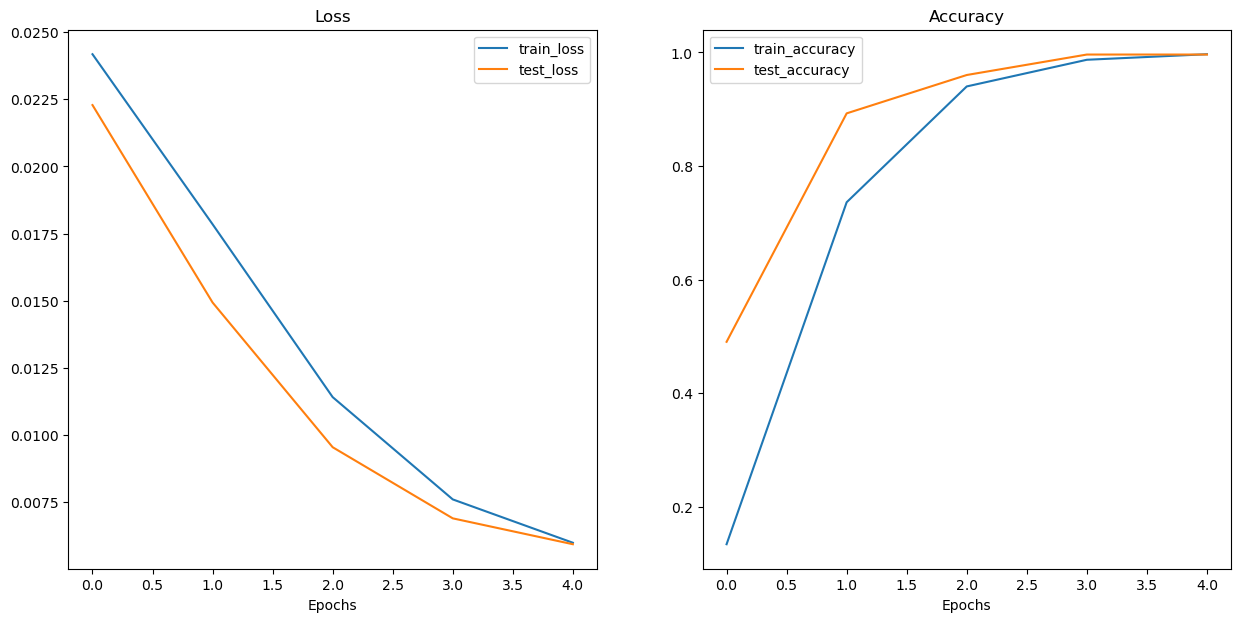

In [25]:
import matplotlib.pyplot as plt

# Plot loss curves model
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()
    
plot_loss_curves(results)

In [26]:
# %%writefile predict.py

def predict(model, text):
    text = text.lower()
    text_dict = tokenizer(text, padding='max_length', max_length = 20, truncation=True, return_tensors="pt")
    use_mps = torch.backends.mps.is_available()
    device = torch.device("mps" if use_mps else "cpu")
    model = model.to(device)
    mask = text_dict['attention_mask'].to(device)
    input_id = text_dict['input_ids'].squeeze(1).to(device)
        
    model.eval() 
    with torch.inference_mode():
        output = model(input_id, mask)
        label_id = output.argmax(dim=1).item()
        return label_id

In [28]:
# Setup labels for prediction
with open("../class_names.txt", "r") as f:
  class_names = [prompt.strip() for prompt in f.readlines()]

In [61]:
custom_model.eval()
prediction=predict(custom_model, text="I FEEL SAD")
print(f"You might have symptomps of {labels[prediction]}, please seek some medical help!")

You might have symptomps of Emotional pain, please seek some medical help!


In [34]:
target_dir_path = Path('../models/')
target_dir_path.mkdir(parents=True, exist_ok=True)

model_save_path = target_dir_path / "FirstAidClassifier.pth"

# Save model
print(f"Saving model to {model_save_path}")
torch.save(obj=custom_model.state_dict(), f=model_save_path)

Saving model to ../models/FirstAidClassifier.pth


In [41]:
model_loaded = BertClassifier()
model_loaded.load_state_dict(torch.load('../models/FirstAidClassifier.pth'))

<All keys matched successfully>

In [43]:
with open("../class_names.txt", "r") as f:
  labels = [prompt.strip() for prompt in f.readlines()]

In [62]:
transcript = "I FEEL SAD"

In [63]:
prediction=predict(model_loaded, text=transcript)
print(f"You might have symptomps of {labels[prediction]}, please seek some medical help!")

You might have symptomps of Emotional pain, please seek some medical help!
